## Neural Network with Keras
References: 

* Machine Learning Mastery, https://machinelearningmastery.com/deep-learning-with-python/

* Deep Learning with Python, François Chollet

### Anatomy of a neural network  

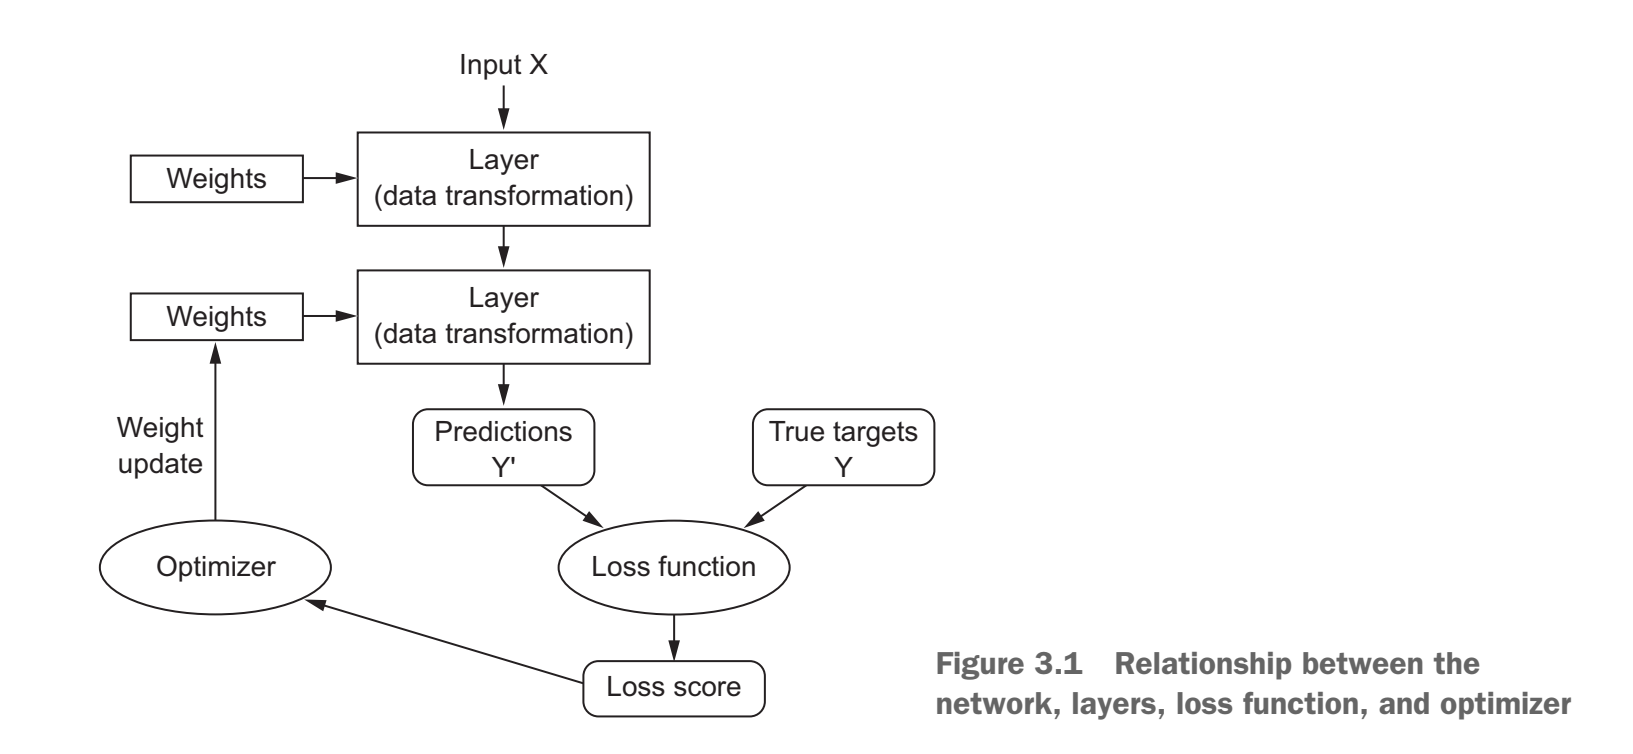




Layers, which are combined into a network (or model)
The input data and corresponding targets
The loss function, which defines the feedback signal used for learning
The optimizer, which determines how learning proceeds  



A layer is a data-processing module that takes as input one or
more tensors and that outputs one or more tensors. Some layers are stateless, but
more frequently layers have a state: the layer’s weights, one or several tensors learned
with stochastic gradient descent, which together contain the network’s knowledge.  


Loss function (objective function)—The quantity that will be minimized during
training. It represents a measure of success for the task at hand.
Optimizer—Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).


Choosing the right objective function for the right problem is extremely important: your network will take any shortcut it can, to minimize the loss; so if the objective
doesn’t fully correlate with success for the task at hand, your network will end up
doing things you may not have wanted.

### Introduction to Keras
 Keras is a
deep-learning framework for Python that provides a convenient way to define and
train almost any kind of deep-learning model. Keras was initially developed for
researchers, with the aim of enabling fast experimentation.
Keras has the following key features:
* It allows the same code to run seamlessly on CPU or GPU.
* It has a user-friendly API that makes it easy to quickly prototype deep-learning
models.
* It has built-in support for convolutional networks (for computer vision), recurrent networks (for sequence processing), and any combination of both.
* It supports arbitrary network architectures: multi-input or multi-output models,
layer sharing, model sharing, and so on. This means Keras is appropriate for
building essentially any deep-learning model, from a generative adversarial network to a neural Turing machine.

### Neural Network Models in Keras

The simplest model is defined in the Sequential class which is a linear stack of Layers.
You can create a Sequential model and define all of the layers in the constructo

In [ ]:
from keras.models import Sequential

model = Sequential(...)
model.add(...)
model.add(...)
model.add(...)

### Model Inputs

The first layer in your model must specify the shape of the input.

This is the number of input attributes and is defined by the input_dim argument. This argument expects an integer.

For example, you can define input in terms of 8 inputs for a Dense type layer as follows:

In [ ]:
Dense(16, input_dim=8)

### Model Layers

Layers of different type are a few properties in common, specifically their method of weight initialization and activation functions.

#### Weight Initialization

The type of initialization used for a layer is specified in the init argument.

Some common types of layer initialization include:

* “uniform“: Weights are initialized to small uniformly random values between 0 and 0.05.
* “normal“:Weights are initialized to small Gaussian random values (zero mean and standard deviation of 0.05).
* “zero“: All weights are set to zero values.


### Activation Function

Keras supports a range of standard neuron activation function, such as: softmax, rectifier, tanh and sigmoid.

You typically specify the type of activation function used by a layer in the activation argument, which takes a string value.

### Layer Types


There are a large number of core Layer types for standard neural networks.

Some common and useful layer types you can choose from are:

* Dense: Fully connected layer and the most common type of layer used on multi-layer perceptron models.
* Dropout: Apply dropout to the model, setting a fraction of inputs to zero in an effort to reduce over fitting.
* Merge: Combine the inputs from multiple models into a single model.

### Model Compilation

Once you have defined your model, it needs to be compiled.

This creates the efficient structures used by the underlying backend (Theano or TensorFlow) in order to efficiently execute your model during training.

You compile your model using the compile() function and it accepts three important attributes:

1 - Model optimizer.

2 - Loss function.

3 - Metrics.

###  Model Optimizers

The optimizer is the search technique used to update weights in your model.

You can create an optimizer object and pass it to the compile function via the optimizer argument. This allows you to configure the optimization procedure with it’s own arguments, such as learning rate. For example:

In [ ]:
sgd = SGD(...)
model.compile(optimizer=sgd)
model.compile(optimizer='sgd')

Some popular gradient descent optimizers you might like to choose from include:

* SGD: stochastic gradient descent, with support for momentum.
* RMSprop: adaptive learning rate optimization method proposed by Geoff Hinton.
* Adam: Adaptive Moment Estimation (Adam) that also uses adaptive learning rates.

### Model Loss Functions

The loss function, also called the objective function is the evaluation of the model used by the optimizer to navigate the weight space.

You can specify the name of the loss function to use to the compile function by the loss argument. Some common examples include:

‘mse‘: for mean squared error.
‘binary_crossentropy‘: for binary logarithmic loss (logloss).
‘categorical_crossentropy‘: for multi-class logarithmic loss (logloss).

### Model Metrics

Metrics are evaluated by the model during training.

Only one metric is supported at the moment and that is accuracy.

### Model Training

The model is trained on NumPy arrays using the fit() function, for example

In [ ]:
model.fit(X, y, epochs=, batch_size=)

Training both specifies the number of epochs to train on and the batch size.

Epochs (nb_epoch) is the number of times that the model is exposed to the training dataset.
Batch Size (batch_size) is the number of training instances shown to the model before a weight update is performed.

### Model Prediction

Once you have trained your model, you can use it to make predictions on test data or new data.

There are a number of different output types you can calculate from your trained model, each calculated using a different function call on your model object. For example:

* model.evaluate(): To calculate the loss values for input data.
* model.predict(): To generate network output for input data.
* model.predict_classes(): To generate class outputs for input data.
* model.predict_proba(): To generate class probabilities for input data.

### Predicting house prices: a regression example
You’ll attempt to predict the median price of homes in a given Boston suburb in the
mid-1970s, given data points about the suburb at the time, such as the crime rate, the
local property tax rate, and so on. The dataset you’ll use has an interesting difference
from the two previous examples. It has relatively few data points: only 506, split
between 404 training samples and 102 test samples. And each feature in the input data
(for example, the crime rate) has a different scale. For instance, some values are proportions, which take values between 0 and 1; others take values between 1 and 12, others between 0 and 100, and so on.

In [8]:
import numpy as np
import pandas as pd


In [2]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 3us/step


In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous
data, but it would definitely make learning more difficult. A widespread best practice
to deal with such data is to do feature-wise normalization: for each feature in the input
data (a column in the input data matrix), you subtract the mean of the feature and
divide by the standard deviation, so that the feature is centered around 0 and has a
unit standard deviation. This is easily done in Numpy.

#### Normalizing the data

In [7]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

Note that the quantities used for normalizing the test data are computed using the
training data. You should never use in your workflow any quantity computed on the
test data, even for something as simple as data normalization.

### Building your network

In [9]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

The network ends with a single unit and no activation (it will be a linear layer). This is
a typical setup for scalar regression (a regression where you’re trying to predict a single
continuous value). Applying an activation function would constrain the range the output can take; for instance, if you applied a sigmoid activation function to the last layer,
the network could only learn to predict values between 0 and 1. Here, because the last
layer is purely linear, the network is free to learn to predict values in any range.

### Validating your approach using K-fold validation

To evaluate your network while you keep adjusting its parameters (such as the number
of epochs used for training), you could split the data into a training set and a validation set, as you did in the previous examples. But because you have so few data points,
the validation set would end up being very small (for instance, about 100 examples).
As a consequence, the validation scores might change a lot depending on which data
points you chose to use for validation and which you chose for training: the validation
scores might have a high variance with regard to the validation split. This would prevent you from reliably evaluating your model.
The best practice in such situations is to use K-fold cross-validation (see figure 3.11).
It consists of splitting the available data into K partitions (typically K = 4 or 5), instantiating K identical models, and training each one on K – 1 partitions while evaluating on
the remaining partition. The validation score for the model used is then the average of
the K validation scores obtained. In terms of code, this is straightforward.

In [15]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [16]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
processing fold # 1
processing fold # 2
processing fold # 3


In [18]:
all_scores

[2.0729169397070857, 2.2302932692046213, 2.878645587675642, 2.416398022434499]

In [19]:
np.mean(all_scores)

2.3995634547554623

### Saving the validation logs at each fold

In [22]:
num_epochs = 10
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [23]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

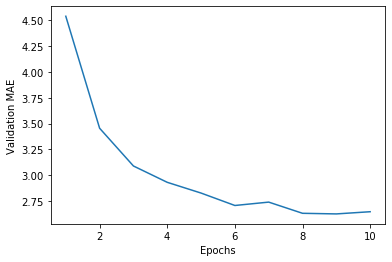

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [27]:
model = build_model()
model.fit(train_data, train_targets,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 4ms/step


In [28]:
test_mse_score

18.209722032733993